In [1]:
import os
import csv
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from tabulate import tabulate
from kaggle.api.kaggle_api_extended import KaggleApi

import utility as util
import utility.doc

# utility function
newline = '\n'
alphabet = tuple(k for k in string.ascii_lowercase)
print(alphabet[:10])

def df_to_str(df):
    return tabulate(df, headers='keys', showindex=False, tablefmt='grid')

('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j')


## Basics

In [2]:
# creating a dataframe
pd.DataFrame({'key': alphabet[:4], 'val': 4})

,key,val
0,a,4
1,b,4
2,c,4
3,d,4


In [4]:
# Print dataframe as a table
df = pd.DataFrame({'key': alphabet[:4], 'val': 4})
print(tabulate(df, headers='keys', showindex=False, tablefmt='grid'))

+-------+-------+
| key   |   val |
+=======+=======+
| a     |     4 |
+-------+-------+
| b     |     4 |
+-------+-------+
| c     |     4 |
+-------+-------+
| d     |     4 |
+-------+-------+


In [5]:
# DataFrame basics
df = pd.DataFrame({'key': alphabet[:4], 'val': 4})
util.doc.results(
    "data frame", df_to_str(df),
    "'key' column", df['key'],
    "'val' column", df['val'],
    "columns", df.columns,
)

data frame
+-------+-------+
| key   |   val |
+=======+=======+
| a     |     4 |
+-------+-------+
| b     |     4 |
+-------+-------+
| c     |     4 |
+-------+-------+
| d     |     4 |
+-------+-------+

'key' column
0    a
1    b
2    c
3    d
Name: key, dtype: object

'val' column
0    4
1    4
2    4
3    4
Name: val, dtype: int64

columns
Index(['key', 'val'], dtype='object')


In [11]:
# data from ndarray
columns = ['val1', 'val2']
data = np.array([[1, 1], [2, 1], [1, 2]])
df = pd.DataFrame(data, columns=columns)
df

,val1,val2
0,1,1
1,2,1
2,1,2


In [8]:
# data from range/iterable
df = pd.DataFrame({'key': alphabet[:4], 'val': range(1,5)})
df

,key,val
0,a,1
1,b,2
2,c,3
3,d,4


In [20]:
# Series basics
s = pd.Series({'key': 'a', 'val1': 1, 'val2': 2})
util.doc.results(
    "series", s,
    "'key' index as dict field", s['key'],
    "'val' index as attribute", s.val1,
    "indices of series", s.index,
    "values of series", s.values,
    "ndarray of values from indices 'val1', 'val2'", s[['val1', 'val2']].values
)

series
key     a
val1    1
val2    2
dtype: object

'key' index as dict field
a

'val' index as attribute
1

indices of series
Index(['key', 'val1', 'val2'], dtype='object')

values of series
['a' 1 2]

ndarray of values from indices 'val1', 'val2'
[1 2]


In [34]:
# creating a series from a util.AttrDict
d = util.AttrDict(key="a", a=1, b=2)
pd.Series(d)

key    a
a      1
b      2
dtype: object

In [9]:
# creating a dataframe from a list of series
s1 = pd.Series({"key": "a", "val1": True, "val2": -2})
s2 = pd.Series({"key": "b", "val1": False, "val2": 10})
s3 = pd.Series({"key": "c", "val1": True, "val2": 1})
df = pd.DataFrame([s1, s2, s3])
util.doc.results(
    "data frame constructed from series", df,
    "mean of column 'val1'", df["val1"].mean(),
    "sum of column 'val2'", df["val2"].sum(),
    "select rows where column 'val1' is True", df[df["val1"]],
)

data frame constructed from series
  key   val1  val2
0   a   True    -2
1   b  False    10
2   c   True     1

mean of column 'val1'
0.6666666666666666

sum of column 'val2'
9

select rows where column 'val1' is True
  key  val1  val2
0   a  True    -2
2   c  True     1


In [27]:
# creating a dataframe from a list of dict is the same.
# can use default constructor or DataFrame.from_records()
d1 = {"key": "a", "val1": True, "val2": -2}
d2 = {"key": "b", "val1": False, "val2": 10}
d3 = {"key": "c", "val1": True, "val2": 1}
pd.DataFrame([d1, d2, d3])

,key,val1,val2
0,a,True,-2
1,b,False,10
2,c,True,1


In [22]:
# Select from the data frame entries where 'key' is 'a'.
df = pd.DataFrame({'key': alphabet[:2] + alphabet[:2], 'val': np.arange(1,5),})
df.loc[df['key'] == 'a']

,key,val
0,a,1
2,a,3


In [23]:
# Select from the data frame entries where 'key' is not 'a'.
df = pd.DataFrame({'key': alphabet[:2] + alphabet[:2], 'val': np.arange(1,5),})
df.loc[df['key'] != 'a']

,key,val
1,b,2
3,b,4


In [27]:
# Sort data frame by values in the 'val' column
df = pd.DataFrame({'key': alphabet[:4], 'val': (2,1,4,3),})
df.sort_values('val')

,key,val
1,b,1
0,a,2
3,d,3
2,c,4


In [12]:
# Iterate through the rows of the data frame
df = pd.DataFrame({'key': alphabet[:4], 'val': (2,1,4,3),})
for s in df.iterrows():
    print(s)

(0, key    a
val    2
Name: 0, dtype: object)
(1, key    b
val    1
Name: 1, dtype: object)
(2, key    c
val    4
Name: 2, dtype: object)
(3, key    d
val    3
Name: 3, dtype: object)


In [9]:
# The length of the data frame is the number of columns.
df = pd.DataFrame({'key': alphabet[:4], 'val': (2,1,4,3),})
len(df)

4

In [17]:
# If the data frame has only one entry where 'key' is 'a', then select it as a series.
df = pd.DataFrame({'key': alphabet[:4], 'val': np.arange(1,5),})
df.loc[df['key'] == 'a'].iloc[0]

key    a
val    1
Name: 0, dtype: object

In [5]:
# DataFrame basics

# Create a DataFrame using dict of (str: list)
df = pd.DataFrame({'key': alphabet[:4], 'val': np.arange(1,5),})

# each column or row is a pd.Series
print(type(df['val']), type(df.loc[2]))

# index a DataFrame to retrieve a column from it
print(df['val'], newline)

# use DataFrame.loc label based indexing to retrieve a row from it
print(df.loc[2], newline)

# use DataFrame.iloc integer based indexing to retrieve a row from it
print(df.iloc[-1], newline)

# using DataFrame.head() to summarize data frame
df.head()

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
0    1
1    2
2    3
3    4
Name: val, dtype: int64 

key    c
val    3
Name: 2, dtype: object 

key    d
val    4
Name: 3, dtype: object 



,key,val
0,a,1
1,b,2
2,c,3
3,d,4


In [5]:
# Accessing cells of a data frame by row first, or by column first
df = pd.DataFrame({'key': alphabet[:4], 'val': np.arange(1,5),})
df, df.iloc[1]['val'], df['val'][1]

(  key  val
 0   a    1
 1   b    2
 2   c    3
 3   d    4,
 2,
 2)

## Interval indices

In [49]:
# Interval index from left and right bounds
left  = [0, 2, 3, 6]
right = [2, 3, 6, 7]
index = pd.IntervalIndex.from_arrays(left, right)
df = pd.DataFrame({"val1": ["a", "b", "c", "d"]}, index=index)
df["val2"] = range(4)

util.doc.results(
    "column 'val1'", df.val1,
    "val1 at position 1.3", df.loc[1.3].val1,
    "val1 at position 3", df.loc[3].val1,
    "val1, val2 at position 6", df.loc[6][["val1", "val2"]].values,
)
# print(tabulate(df, headers='keys', showindex=False, tablefmt='grid'))
df

column 'val1'
(0, 2]    a
(2, 3]    b
(3, 6]    c
(6, 7]    d
Name: val1, dtype: object

val1 at position 1.3
a

val1 at position 3
b

val1, val2 at position 6
['c' 2]


,val1,val2
"(0, 2]",a,0
"(2, 3]",b,1
"(3, 6]",c,2
"(6, 7]",d,3


In [44]:
# Interval index from interval breaks
index = pd.IntervalIndex.from_breaks([0, 0.5, 1, 2, 6])
df = pd.DataFrame(
    {"values": ["a", "b", "c", "d"]},
    index=index
)
util.doc.results(
    "value at position 0.2", df.loc[0.2]["values"],
    "value at position 0.7", df.loc[0.7]["values"],
compact=True)
df

value at position 0.2 a
value at position 0.7 b


,values
"(0.0, 0.5]",a
"(0.5, 1.0]",b
"(1.0, 2.0]",c
"(2.0, 6.0]",d


In [55]:
d = {
    "at_intersection": [True,  True,  False, False, True,  True,  False],
    "significant":      [True,  False, False, True,  True,  False, True],
    "stopped_car":     [False, True,  True,  False, False, True,  False],
    "major_turn":      [False, False, False, True,  True,  False, False],
    "minor_turn":      [True,  False, False, False, False, False, True] }
df = pd.DataFrame(d, index=range(1, 8))
is_at_intersection = "at_intersection"
is_stopped_car     = "is_stopped_car"
is_major_turn      = "is_major_turn"
is_minor_turn      = "is_minor_turn"

util.doc.results(
    "Select at_intersection and stopped_car", df[df["at_intersection"] & df["stopped_car"]],
    "Select at_intersection or significant", df[df["at_intersection"] | df["significant"]],
    "Select at_intersection, significant and major_turn",
    df[df["at_intersection"] & df["significant"] & df["major_turn"]]
)

Select at_intersection and stopped_car
   at_intersection  significant  stopped_car  major_turn  minor_turn
2             True        False         True       False       False
6             True        False         True       False       False

Select at_intersection or significant
   at_intersection  significant  stopped_car  major_turn  minor_turn
1             True         True        False       False        True
2             True        False         True       False       False
4            False         True        False        True       False
5             True         True        False        True       False
6             True        False         True       False       False
7            False         True        False       False        True

Select at_intersection, significant and major_turn
   at_intersection  significant  stopped_car  major_turn  minor_turn
5             True         True        False        True       False


## Operations on data frames

In [6]:
def get_mock():
    return pd.DataFrame({
            'key': alphabet[:3],
            'val1': np.arange(1,4), 'val2': np.arange(1,4),
            'val3': np.arange(1,4), 'val4': np.arange(1,4)})
get_mock()

,key,val1,val2,val3,val4
0,a,1,1,1,1
1,b,2,2,2,2
2,c,3,3,3,3


In [7]:
df = get_mock()
df['val5'] = 1
df

,key,val1,val2,val3,val4,val5
0,a,1,1,1,1,1
1,b,2,2,2,2,1
2,c,3,3,3,3,1


In [7]:
# Modify
df = get_mock()
df['key'] = 'prefix/' + df['key']
df['key'] += '/suffix'
df

,key,val1,val2,val3,val4
0,prefix/a/suffix,1,1,1,1
1,prefix/b/suffix,2,2,2,2
2,prefix/c/suffix,3,3,3,3


In [8]:
# Operate on columns
_df = get_mock()
# Add values in selected columns in-place
_df['val1'] += 1
_df['val2'] = 1 # or np.array([1,-1])
_df

,key,val1,val2,val3,val4
0,a,2,1,1,1
1,b,3,1,2,2
2,c,4,1,3,3


In [9]:
# Operate on multiple columns at a time
_df = get_mock()
# Add values in selected columns in-place
_df[['val1', 'val2']] += [1,-1] # or np.array([1,-1])
_df[['val3', 'val4']] = [1,-1] # or np.array([1,-1])
_df

,key,val1,val2,val3,val4
0,a,2,0,1,-1
1,b,3,1,1,-1
2,c,4,2,1,-1


In [10]:
# Operate on multiple columns at a time
_df = get_mock()
# Update values in selected columns in place
_df[['val1', 'val2']] = [[1,-1],[-1,1],[1,-1]] # np.array([[1,-1],[-1,1],[1,-1]])
_df

,key,val1,val2,val3,val4
0,a,1,-1,1,1
1,b,-1,1,2,2
2,c,1,-1,3,3


In [11]:
# Operate on rows
df = get_mock()
# Update values in selected row(s)
df[df['key'] == 'a'] = -1
df.loc[1] = 10
df.loc[2] = pd.Series({'key': 'd', 'val1': 1, 'val2': 1, 'val3': 1, 'val4': 1})
df

,key,val1,val2,val3,val4
0,-1,-1,-1,-1,-1
1,10,10,10,10,10
2,d,1,1,1,1


In [12]:
# Operate on multiple rows at a time
df = get_mock()
# Update values in selected row(s)
df.loc[[1,2]] = np.array([['c',1,1,1,1],['d',-1,-1,-1,-1]])
df

,key,val1,val2,val3,val4
0,a,1,1,1,1
1,c,1,1,1,1
2,d,-1,-1,-1,-1


In [13]:
# Operate on cells
# What is the difference between DataFrames loc(), iloc(), at(), iat()
# https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-at-vs-iat
# https://stackoverflow.com/questions/37216485/pandas-at-versus-loc
df = get_mock()
df.at[0, 'val1'] = 100
df.loc[1, 'val2'] = 100
df

,key,val1,val2,val3,val4
0,a,100,1,1,1
1,b,2,100,2,2
2,c,3,3,3,3


In [14]:
# Operate on multiple cells at a time
df = get_mock()
# don't use DataFrame.at(), it's much slower.
df.loc[2:4, ('val3','val4')] = 100
df

,key,val1,val2,val3,val4
0,a,1,1,1,1
1,b,2,2,2,2
2,c,3,3,100,100


## More Operations

In [2]:
def get_mock():
    return pd.DataFrame({
            'key': alphabet[:2] + alphabet[:2],
            'val1': np.arange(1,5), 'val2': np.arange(1,5),
            'val3': np.arange(1,5), 'val4': np.arange(1,5)})
get_mock()

,key,val1,val2,val3,val4
0,a,1,1,1,1
1,b,2,2,2,2
2,a,3,3,3,3
3,b,4,4,4,4


In [4]:
# modify val1 when where key is 'a'
df = get_mock()
df.loc[df['key'] == 'a','val1'] = 100
df

,key,val1,val2,val3,val4
0,a,100,1,1,1
1,b,2,2,2,2
2,a,100,3,3,3
3,b,4,4,4,4


## Seaborn Dataset

In [8]:
flights = sns.load_dataset("flights")
sum_passengers = flights.groupby("year")["passengers"].sum()
util.doc.results(
    "The flights seaborn dataset.", flights.head(),
    "Sum the number of passengers within a year", sum_passengers[:4],
)

The flights seaborn dataset.
   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

Sum the number of passengers within a year
year
1949    1520
1950    1676
1951    2042
1952    2364
Name: passengers, dtype: int64


## Kaggle Datasets

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


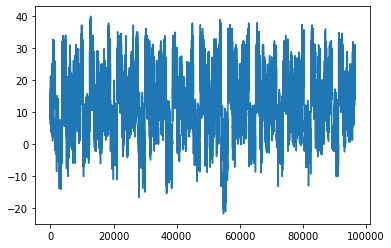

In [3]:
# read CSV of weather history. See doc.kaggle.ipynb on how to download CSV
weather_csvfile = "../data/weatherHistory.csv"
weather_df = pd.read_csv(weather_csvfile)
# weather_df["Formatted Date"]
plt.plot(weather_df["Temperature (C)"])
weather_df.head()

In [15]:
print("Headers of CSV")
print(*weather_df.columns.values.tolist(), sep=", ")

Headers of CSV
Formatted Date, Summary, Precip Type, Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Loud Cover, Pressure (millibars), Daily Summary


In [49]:
# Convert date strings to datetime
datetimes = pd.to_datetime(weather_df["Formatted Date"][:5])
datetimes

0   2006-04-01 00:00:00+02:00
1   2006-04-01 01:00:00+02:00
2   2006-04-01 02:00:00+02:00
3   2006-04-01 03:00:00+02:00
4   2006-04-01 04:00:00+02:00
Name: Formatted Date, dtype: datetime64[ns, pytz.FixedOffset(120)]

## Misc

In [17]:
# Applying numpy operations on series gives back series
df = pd.DataFrame({'key': alphabet[:6], 'deg': np.linspace(0, 2*np.pi, 6),})
np.sin(df['deg']), np.sin(df['deg'].values)

(0    0.000000e+00
 1    9.510565e-01
 2    5.877853e-01
 3   -5.877853e-01
 4   -9.510565e-01
 5   -2.449294e-16
 Name: deg, dtype: float64,
 array([ 0.00000000e+00,  9.51056516e-01,  5.87785252e-01, -5.87785252e-01,
        -9.51056516e-01, -2.44929360e-16]))

In [18]:
# In-place mutation of columns
df = pd.DataFrame({
    'key': alphabet[:3],
    'val1': np.arange(1,4), 'val2': np.arange(1,4),
    'val3': np.arange(1,4), 'val4': np.arange(1,4)})
df1 = df.copy()
df['val2'] /= 2
df[['val1', 'val3']] *= 2
df['val4'] = np.exp(df['val4'])
df2 = df.copy()
df[['val1', 'val2']] += np.array([1, 2])
df1, df2, df

(  key  val1  val2  val3  val4
 0   a     1     1     1     1
 1   b     2     2     2     2
 2   c     3     3     3     3,
   key  val1  val2  val3       val4
 0   a     2   0.5     2   2.718282
 1   b     4   1.0     4   7.389056
 2   c     6   1.5     6  20.085537,
   key  val1  val2  val3       val4
 0   a     3   2.5     2   2.718282
 1   b     5   3.0     4   7.389056
 2   c     7   3.5     6  20.085537)

In [19]:
# In-place mutation of columns
df = pd.DataFrame({'key': alphabet[:3], 'val1': np.arange(1,4),
        'val2': np.arange(1,4), 'val3': np.arange(2,5), 'val4': np.arange(2,5)})
df[['val1', 'val3']] = 0
df[['val2', 'val4']] = df[['val2', 'val4']].values[0]
df

,key,val1,val2,val3,val4
0,a,0,1,0,2
1,b,0,1,0,2
2,c,0,1,0,2


In [20]:
# Concatenate two data frames.
df1 = pd.DataFrame({'key': alphabet[:4], 'val': np.arange(1,5)})
df2 = pd.DataFrame({'key': alphabet[4:8], 'val': np.arange(5,9)})
pd.concat((df1, df2), ignore_index=True)

,key,val
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5
5,f,6
6,g,7
7,h,8


In [21]:
# Iterate the rows of a data frame.
df = pd.DataFrame({'key': alphabet[:3], 'val': np.arange(1,4)})
for i, s in df.iterrows():
    print(i, *[ f"  {k}: {s[k]}  " for k in s.index ])

0   key: a     val: 1  
1   key: b     val: 2  
2   key: c     val: 3  


In [22]:
# Create an empty DataFrame
columns = ['key', 'val1', 'val2']
df = pd.DataFrame(columns=columns)
print(df, newline)
# append rows to the end of data frame
df.loc[len(df)] = ['a', 1, 1]
df.loc[len(df)] = ['b', 2, 2]
print(df, newline)
# add a new column to DataFrame and populate it
df['str'] = ['abba', 'zetta']
print(df)

Empty DataFrame
Columns: [key, val1, val2]
Index: [] 

  key val1 val2
0   a    1    1
1   b    2    2 

  key val1 val2    str
0   a    1    1   abba
1   b    2    2  zetta


In [23]:
# Convert a series into a data frame
s = pd.Series({'key': 'a', 'val': 1})
pd.DataFrame([s])

,key,val
0,a,1


In [24]:
# Finding unique values of a column in a data frame.
# Create a DataFrame using dict of (str: list)
df = pd.DataFrame({'key': alphabet[:8], 'val': np.arange(1,9),})
df['val'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [25]:
# Select rows in data frame by column values.
data = {'key': alphabet[:8],
        'val': [1, 2, 2, 4, 2, 6, 7, 8]}
df = pd.DataFrame(data)
df[df['val'] == 2]

,key,val
1,b,2
2,c,2
4,e,2


In [26]:
# Merge two data frames (similar to SQL JOIN statement)
# In this use case, I'm using the second data frame to filter
# the first data frame by composite key (frame_id, node_id) 

# See:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

data1 = {
    'frame_id': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'node_id':  [1, 2, 3, 1, 2, 3, 1, 2, 3],
    'x':        [1, 0, 1, 0, 1, 0, 1, 0, 1],
    'y':        [1, 1, 0, 0, 1, 1, 0, 0, 1],
}
df1 = pd.DataFrame(data1)
data2 = {
    'frame_id': [1, 2, 2, 2, 3, 3],
    'node_id':  [1, 1, 2, 3, 2, 3]
}
df2 = pd.DataFrame(data2)
pd.merge(df1, df2, how='inner', on=['frame_id', 'node_id'])

,frame_id,node_id,x,y
0,1,1,1,1
1,2,1,0,0
2,2,2,1,1
3,2,3,0,1
4,3,2,0,0
5,3,3,1,1


In [27]:
# Example of data retrieval with 'composite keys'
data = {
    'frame_id': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'node_id':  [1, 2, 3, 1, 2, 3, 1, 2, 3],
    'x':        [1, 0, 1, 0, 1, 0, 1, 0, 1],
    'y':        [1, 1, 0, 0, 1, 1, 0, 0, 1],
}
df = pd.DataFrame(data)
s = df[np.logical_and(df['frame_id'] == 1, df['node_id'] == 2)].iloc[0]
s['x']

0

In [28]:
data = {
    'node_id':  [1, 2, 3],
    'x':        [1, 0, 1],
    'y':        [1, 1, 0],
}
df = pd.DataFrame(data)
# Get the values of column x and y as ndarray.
print(df[['x', 'y']].values)
df[['x', 'y']]

[[1 1]
 [0 1]
 [1 0]]


,x,y
0,1,1
1,0,1
2,1,0


In [29]:
# Make a DataFrame from a dict of iter where iterable items are 'variables' with associated dict key as 'key'.
data = {'animal':  set(['dog','cat','fish']),
        'color':   ['red','blue','green','yellow'],
        'nothing': [],
        'vehicle': iter(['submarine', 'racecar', 'helicopter'])}

df = pd.DataFrame.from_dict(data, orient='index')
print(df)
df = df.stack().to_frame().reset_index().drop('level_1', axis=1)
df.columns = ['key', 'variable']
df

                 0        1           2       3
animal         dog      cat        fish    None
color          red     blue       green  yellow
nothing       None     None        None    None
vehicle  submarine  racecar  helicopter    None


,key,variable
0,animal,dog
1,animal,cat
2,animal,fish
3,color,red
4,color,blue
5,color,green
6,color,yellow
7,vehicle,submarine
8,vehicle,racecar
9,vehicle,helicopter


In [30]:
# Create an empty DataFrame with columns, and default int row indices
columns = ['key', 'val1', 'val2']
data = [['a', 1, 1], ['b', 2, 2], ['a', 1, 1]]
df = pd.DataFrame(data, columns=columns)
print(df)
print()

# selecting rows with key column a
print("Selecting rows where key column contains 'a'")
print(df[df['key'] == 'a'])
print("Number of rows:", len(df[df['key'] == 'a']))
print(isinstance(df[df['key'] == 'a'], pd.DataFrame))
print("'a' in df['key']?", 'a' in df['key'].values )
print()

# selecting rows with key column c
print("Selecting rows where key column contains 'c'")
print("Gives empty data frame")
print(df[df['key'] == 'c'])
print("Number of rows:", len(df[df['key'] == 'c']))
print(isinstance(df[df['key'] == 'c'], pd.DataFrame))
print("'c' in df['key']?", 'c' in df['key'].values )
print()

#
print(df[df['key'] == 'a'].iloc[0])

  key  val1  val2
0   a     1     1
1   b     2     2
2   a     1     1

Selecting rows where key column contains 'a'
  key  val1  val2
0   a     1     1
2   a     1     1
Number of rows: 2
True
'a' in df['key']? True

Selecting rows where key column contains 'c'
Gives empty data frame
Empty DataFrame
Columns: [key, val1, val2]
Index: []
Number of rows: 0
True
'c' in df['key']? False

key     a
val1    1
val2    1
Name: 0, dtype: object


In [31]:
# Create an empty DataFrame with columns, and str row indices
columns = ['val1', 'val2']
df = pd.DataFrame(columns=columns)
print(df)
# append a row to the end of DataFrame
df.loc['a'] = [1, 1]
df.loc['b'] = [2, 2]
df['str'] = ['abba', 'zetta']
print(df)
print("check that ")
print("Index 'b' exists?", 'b' in df.index)
print('c' in df.index)
try:
    df['c']
except KeyError as e:
    print('KeyError', e)
print()

print("Locate a row in a data frame")
print(df.loc['a'])
print()

print("Locate a column in a data frame")
print(df['str'])
print(df['str'].at['a'])
print()

print("Locate a single cell in a data frame")
# DataFrame.at() works similarly to DataFrame.loc()
# can only be used to access cells, not entire axes
print(df.at['a', 'val2'])
print(df.loc['a', 'val2'])
print(df.loc['a'].at['val1'])
print(df.loc['a'].loc['val1'])

Empty DataFrame
Columns: [val1, val2]
Index: []
  val1 val2    str
a    1    1   abba
b    2    2  zetta
check that 
Index 'b' exists? True
False
KeyError 'c'

Locate a row in a data frame
val1       1
val2       1
str     abba
Name: a, dtype: object

Locate a column in a data frame
a     abba
b    zetta
Name: str, dtype: object
abba

Locate a single cell in a data frame
1
1
1
1


In [32]:
# Create a total row at the bottom.
columns = ['val1', 'val2']
df = pd.DataFrame(columns=columns)
df.loc['a'] = [1, 1]
df.loc['b'] = [2, 3]
df.loc['c'] = [3, 9]
# DataFrame.sum() as pd.Series
print(df.sum().astype(int))
print()
df.loc["Total"] = df.sum().astype(int)
print(df)

val1     6
val2    13
dtype: int64

      val1 val2
a        1    1
b        2    3
c        3    9
Total    6   13


In [33]:
# Create an empty DataFrame with columns, and str row indices
columns = ['val1', 'val2', 'str']
data = [[1, 3, 'abba'], [2, 4, 'zetta']]
index = ['a', 'b']
df = pd.DataFrame(data, columns=columns, index=index)
print(df)
df.at['c', 'val1'] = 6
df.at['c', 'val2'] = 7
df.at['c', 'str'] = 'qwerty'
print(df)

   val1  val2    str
a     1     3   abba
b     2     4  zetta
   val1  val2     str
a   1.0   3.0    abba
b   2.0   4.0   zetta
c   6.0   7.0  qwerty


In [34]:
# Select part of the dataframe that contains consecutively increasing frame_id
def longest_sequence_using_split(l, split):
    n = len(l)
    longest_size  = 0
    longest_begin = None
    longest_end   = None
    curr_begin = 0
    curr_end   = 0
    while curr_end < n:
        if split(l, curr_end) or curr_end == n - 1:
            if (curr_end - curr_begin + 1)  > longest_size:
                longest_size  = curr_end - curr_begin + 1
                longest_begin = curr_begin
                longest_end   = curr_end
            curr_begin = curr_end + 1
            curr_end   = curr_end + 1
        else:
            curr_end  += 1
    if longest_size == 0:
        return None, longest_size
    else:
        return slice(longest_begin, longest_end+1), longest_size

def longest_consecutive_increasing_subsequence(l):
    def split(l, i):
        try:
            return l[i + 1] != l[i] + 1
        except:
            return False
    return longest_sequence_using_split(l, split)

data = {
    'frame_id': [1, 2, 3, 4, 5, 6, 8, 9, 10],
    'x':        [1, 0, 1, 0, 1, 0, 1, 0, 1],
    'y':        [1, 1, 0, 0, 1, 1, 0, 0, 1],
    'dx':       [1, 1, 1, 0, 0, 0, 1, 1, 1],
    'dy':       [1, 1, 1, 1, 0, 0, 0, 0, 1],}
df = pd.DataFrame(data)
s, sz = longest_consecutive_increasing_subsequence(df['frame_id'])
print(sz)
df[s]

6


,frame_id,x,y,dx,dy
0,1,1,1,1,1
1,2,0,1,1,1
2,3,1,0,1,1
3,4,0,0,0,1
4,5,1,1,0,0
5,6,0,1,0,0


In [35]:
data1 = {
    'frame_id': [1, 2, 3, 4, 5, 6, 8, 9, 10],
    'x':        [1, 0, 1, 0, 1, 0, 1, 0, 1],
    'y':        [1, 1, 0, 0, 1, 1, 0, 0, 1],
    'dx':       [1, 1, 1, 0, 0, 0, 1, 1, 1],
    'dy':       [1, 1, 1, 1, 0, 0, 0, 0, 1],}
data2 = {
    'frame_id': [0, 1, 2, 5, 6, 7, 8, 9, 10],
    'x':        [1, 0, 1, 0, 1, 0, 1, 0, 1],
    'y':        [1, 1, 0, 0, 1, 1, 0, 0, 1],
    'dx':       [1, 1, 1, 0, 0, 0, 1, 1, 1],
    'dy':       [1, 1, 1, 1, 0, 0, 0, 0, 1],}
df = pd.DataFrame(data2)
print(type(df['frame_id'].values))
s, sz = util.longest_consecutive_increasing_subsequence(df['frame_id'].values)
print(sz)
df = df[s]
# df['frame_id'] = np.arange(sz)
df

<class 'numpy.ndarray'>
6


,frame_id,x,y,dx,dy
3,5,0,0,0,1
4,6,1,1,0,0
5,7,0,1,0,0
6,8,1,0,1,0
7,9,0,0,1,0
8,10,1,1,1,1


In [36]:
# DataFrames sometimes keep views of array data instead of creating a copy of the data
# so modifying the data frame may modify the original reference to the array that was used to create the dataframe.
a  = np.arange(1,4)
b  = a.copy()

example = True
if example:
    df = pd.DataFrame(a, columns=['val'])
else:
    df = pd.DataFrame({
            'key': alphabet[:3],
            'val': a})

df.at[0, 'val'] = 1e12
print(a, b)
df

[1000000000000             2             3] [1 2 3]


,val
0,1000000000000
1,2
2,3


In [6]:
# get mean and deviation from values in data frame corresponding to specific keys
d = {'key': tuple('ababa'), 'val': [-1,0,1,2,100]}
df = pd.DataFrame(d)
float(df[df['key'] == 'a'].mean()), float(np.sqrt( df[df['key'] == 'a'].var() ))

(33.333333333333336, 57.74368652357877)